 # MPA-MLF, Lab 7 - NN + Convolutional Neural Network

## Exercise 1 - XOR problem

During the last lecture, we saw that the single perceptron model with a step function could be used only for solving linearly-separable classification problems. Because of that, a single perceptron can not be trained to be able to behave like an XOR gate. To approximate the XOR gate using a neural network, we need to use the following structure:

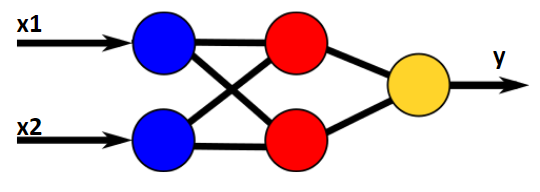

The above structure contains three layers: two neurons in the input layer (blue), two in the hidden layer and one in the output layer (yellow). The input layer represents the identity functions (the outputs are equal to the inputs)

We will use *Keras* API to build and train our neural network. Keras is an open-source neural network library written in Python. It is designed to enable fast experimentation with deep neural networks and provides a high-level API for building and training neural networks.

### 0. First import libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
import tensorflow as tf
import matplotlib.pyplot as plt

### 1. prepare data

In this part, the task would be to prepade our dataset, basically it is the logic table for *XOR* function

In [2]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

### 2. Creating the model

To create a model of NN that is in the picture above, run the following cell

In [3]:
model = Sequential()
model.add(InputLayer(input_shape=(2)))
model.add(Dense(2, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

**Sequential** is a model type used in Keras for building feedforward neural networks. It is called "sequential" because the layers are stacked sequentially on top of each other, and the output of one layer is passed as input to the next layer.

To create a sequential model, instantiate a Sequential object and then add layers to it using the **add()** method. There are many layers that Keras offers. We will use *Dense layer*

**Dense layer** represents a fully connected layer, which means that every neuron in the layer is connected to every neuron in the previous layer. In each layer, we will specify an activation function and the number of neurons that layer contains. The input layer is not defined as a dense layer, but instead of that, we will specify the *input_dim* parameter in the layer that follows the input layer. *input_dim* parameter specifies the number of neurons in the input layer

### 3. Compile the model

To compile yor model run:

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

**keras.complile()** is used to configure the learning process before training the model.
We need to specify 3 parameters:
- *loss*, *optimizer* and *metrics*

- as our loss function (error function/objective function), we will choose *binary_crossentropy* - loss function often used for binary classification

- *optimizer* is optimization algorithm used for optimizing weights in our training process, we will choose *stochastic gradient descent*

- *metrics* is metric user for model evaluation


### 4. Model training

In the lecture, we talked about training the Multi-layer perceptron. The training process consists of the following steps:

1. Weight initialization
2. Forward Propagation
3. Compute Loss
4. Backpropagation
5. Update Weights
6. Repeat 2->6 until maximum epochs are reached

When training a machine learning model, the training data is usually divided into batches (parts), and the model updates its weights after processing each batch. The batch size determines how many training examples are included in each batch.

For example, we have 10,000 training examples and a batch size of 100. In this case, the training data would be divided into 100 batches of 100 examples each. During training, the model would process each batch, calculate the loss or error, and update its weights based on the average of the errors in that batch. In other words, if we batch equal to 1. we will update the weights 10 000 times. If we have batch size == 100, we will update the weights only 100 times

To train your model, run the following line of the code:

In [5]:
history = model.fit(X, y, epochs=2000, batch_size=1, verbose=0)

the method **.fit()**, is used to train the model. We can see that it takes several input parameters:
 - *X* - input data
 - *y* - label for the input data
 - *epochs* number of training epochs (iterations)
 - *batch_size* - number of samples in each batch
 - *verbose* - set verbose parameter to see the progress of loss and metrics during the training epochs

These are not the only parameters the .fit() method can take. Check official documentation: https://keras.io/api/models/model_training_apis/

We will set the output of our .fit() function to variable *history*, where the loss and other metrics defined above in the .compile() function during the training are saved.

### 5. Model evaluation

Out training process is finished. To evaluate the performance of our model on test data, tun the following cell of the code:

In [6]:
loss, accuracy = model.evaluate(X, y, verbose=0)
print('Accuracy: {:.2f}'.format(accuracy*100))

Accuracy: 100.00


### 6. Model predictions

In [7]:
for id_x, data_sample in enumerate(X):
  prediction = model.predict([data_sample])
  print(f"Data sample is {data_sample}, prediction from model {prediction}, ground_truth {y[id_x]}")

1/1 [==============================] - 0s 87ms/step
Data sample is [0, 0], prediction from model [[0.01453186]], ground_truth 0
1/1 [==============================] - 0s 32ms/step
Data sample is [0, 1], prediction from model [[0.98318636]], ground_truth 1
1/1 [==============================] - 0s 36ms/step
Data sample is [1, 0], prediction from model [[0.98322684]], ground_truth 1
1/1 [==============================] - 0s 32ms/step
Data sample is [1, 1], prediction from model [[0.02646037]], ground_truth 0


Text(0, 0.5, 'loss')

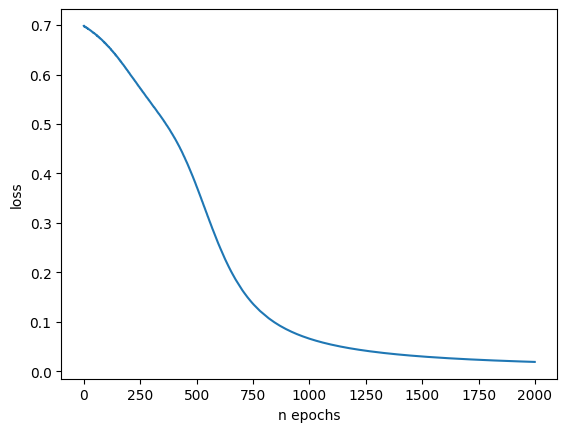

In [8]:
plt.figure()
plt.plot(history.history['loss'])
plt.xlabel('n epochs')
plt.ylabel('loss')

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [34]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #

from keras.utils import to_categorical
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten
from keras.optimizers import SGD


###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [12]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

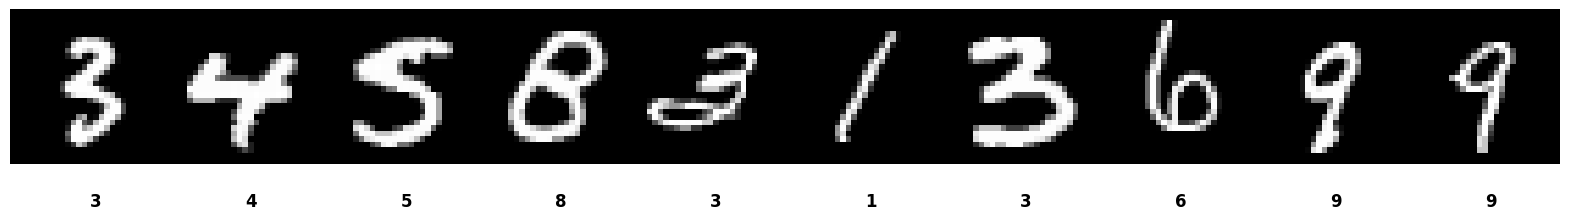

In [13]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [14]:
X_train.shape

(60000, 28, 28)

In [42]:
###################################
# Write your own code here #

X_train_exp = np.expand_dims(X_train, -1)
X_test_exp = np.expand_dims(X_test, -1)

X_train_scaled = X_train_exp.astype('float32') / 255.0
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)


###################################

In [20]:
X_train_exp.shape

(60000, 28, 28, 1)

### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [25]:
input_shape = (28, 28, 1)

In [37]:
model = Sequential()
###################################
# Write your own code here #

model.add(Input(shape=input_shape))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


###################################


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [46]:


###################################
# Write your own code here #

optimizer = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


###################################
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 5408)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [47]:
###################################
# Write your own code here #

history = model.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=64, validation_split = 0.2)


###################################

Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 1.4059 - accuracy: 0.7551 - val_loss: 1.0009 - val_accuracy: 0.8209
Epoch 2/10
750/750 [==============================] - 3s 3ms/step - loss: 0.8317 - accuracy: 0.8221 - val_loss: 0.6460 - val_accuracy: 0.8590
Epoch 3/10
750/750 [==============================] - 3s 4ms/step - loss: 0.6131 - accuracy: 0.8503 - val_loss: 0.5134 - val_accuracy: 0.8711
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.5188 - accuracy: 0.8652 - val_loss: 0.4487 - val_accuracy: 0.8801
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4679 - accuracy: 0.8747 - val_loss: 0.4124 - val_accuracy: 0.8875
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4362 - accuracy: 0.8803 - val_loss: 0.3883 - val_accuracy: 0.8931
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.4145 - accuracy: 0.8839 - val_loss: 0.3715 - val_accuracy: 0.8965
Epoch 

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

In [48]:
###################################
# Write your own code here #

score = model.evaluate(X_test, y_test_encoded, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: {score[1]*100} %')


###################################

Test loss: 40.633766174316406
Test accuracy: 90.25999903678894 %


### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

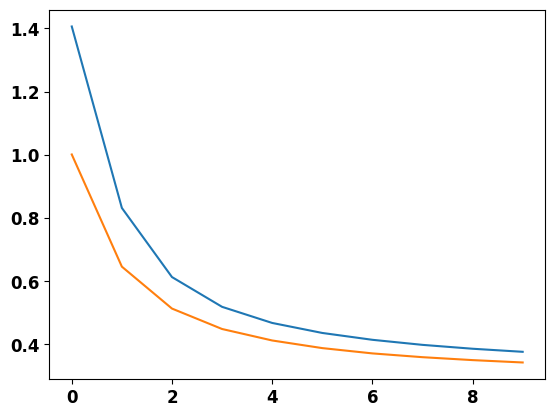

In [49]:
###################################
# Write your own code here #
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


###################################

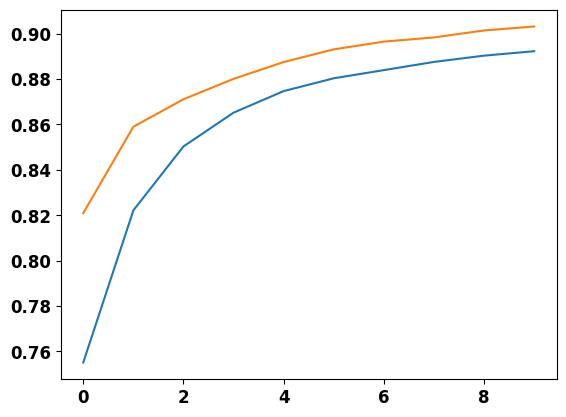

In [50]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### TASK
 - Play around with the code above, try to achieve as highest testing accuracy as possible

 - Check online for the following terms: Overfitting, Regularization, Dropout, BatchNormalization
 - Check for other evaluation metrics (Confusion matrix, F1score...)
 - check for other activation functions
 - Check for other optimizing algorithms